# Titanic passengers survival analysis

Titanic sinking was one of the most shocking transportation catastrophes in the history. Let's analyze Titanic passengers data and look for what factors could affect passengers chances to survive. The analysis will be based on classic data set available on [Kaggle](https://www.kaggle.com/c/titanic).

## 1. Questions

There are several interesting things that can be analysed.

- What was the overall survival rate among all passengers?

- How does it differ for women, men or children?

- How does being of specific deck defined chances of survival?

- Were people related or travelling together more probable to survive than those traveling alone?

- Were people relative to each other surviving together or not?

- How does it differ for crew memebers and technical staff?

- What were the factors that could affect person survival chances?

- What were the features that most of passengers in lifeboats shared?

- What were the features that most of passengers who did not survive shared?

- What combination of factors gave the biggest chances for survival? And what combination for the lowest?


These are just initial questions I can come up with. We will later review them after wrangling some data. Let's wrangle then.


## 2. Data wrangling

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

First let's see data set description from Kaggle:

#### Data Dictionary

```
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

#### Variable Notes

```
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```


In [5]:
survival_df = pd.read_csv("data/train.csv")

Let's see how the data looks like and what are its basic features after loading to a Data Frame.

In [6]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
survival_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
survival_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3. Data exploration

Let's first see basic mortality levels among different groups.


### 3.1 What was overall survival rate among all passengers?


Let's start by checking how many passengers records does our data set contains.

In [9]:
survival_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

There is one strange thing here. Official documentation says there were 2224 Titanic passengers and this data set contains information about only 891 of them. For now let's leave it that way and analyze available data. But we should keep in mind that there is a fraction of data we are missing in this analysis and that will need some further analysis. 

Let's then calculate the overal survival ratio for Titanic passengers.

In [10]:
survival_df_survived_grouped = survival_df.groupby("Survived")
survival_df_survived_grouped.groups

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=342)}

In [11]:
survived_count = survival_df_survived_grouped.get_group(1)['Survived'].count()
not_survived_count = survival_df_survived_grouped.get_group(0)['Survived'].count()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def plot_survival_rate(survived_number, not_survived_number, title_group_name):
    fig, axes = plt.subplots(figsize=(7, 7))
    axes.pie([survived_number, not_survived_number], labels=["Survived", "Not survived"], 
             autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * (survived_number+not_survived_number) / 100), 
             shadow=False, startangle=90)
    axes.set_title("Titanic survived vs. not survived ratio among {}".format(title_group_name))
    axes.axis('equal');
    fig.tight_layout()

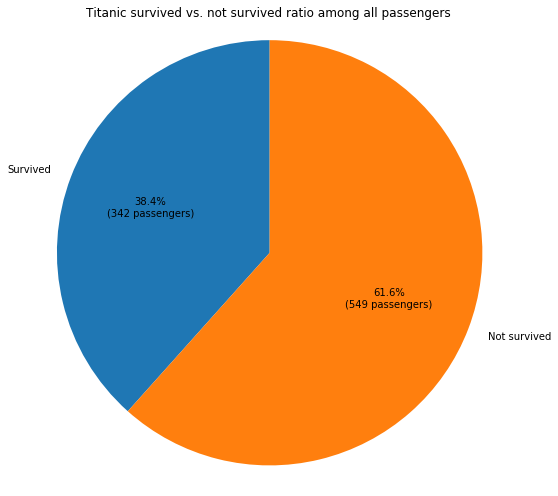

In [14]:
plot_survival_rate(survived_count, not_survived_count, "all passengers")

We can see that overal survival rate among all Titanic passengers was 38.4%.

### 3.2 What was survival rate among women and men?

Let's analyse data with data set divided among genders.

In [15]:
survival_df_sex_grouped = survival_df.groupby("Sex")
survival_df_sex_grouped.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

We have data grouped into two sexes. Let's check how big these groups were.

In [16]:
males_count = survival_df_sex_grouped.get_group("male")['PassengerId'].count()
females_count = survival_df_sex_grouped.get_group("female")['PassengerId'].count()

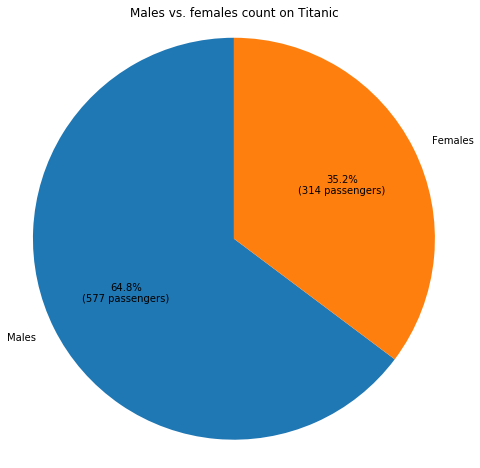

In [17]:
fig, axes = plt.subplots(figsize=(8, 8))
axes.pie([males_count, females_count], labels=["Males", "Females"], 
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * survival_df["PassengerId"].count() / 100), 
         shadow=False, startangle=90)
axes.set_title("Males vs. females count on Titanic")
axes.axis('equal');

We can see that Titanic passengers were 64.8% males and 35.2% females.

Now we can calculate survival ratio among these two groups.

In [18]:
survided_males_number = sum(survival_df_sex_grouped.get_group("male")["Survived"] == 1)
not_survided_males_number = sum(survival_df_sex_grouped.get_group("male")["Survived"] == 0)

survided_females_number = sum(survival_df_sex_grouped.get_group("female")["Survived"] == 1)
not_survided_females_number = sum(survival_df_sex_grouped.get_group("female")["Survived"] == 0)

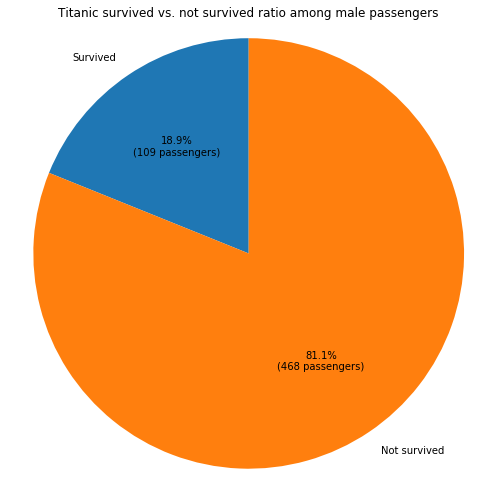

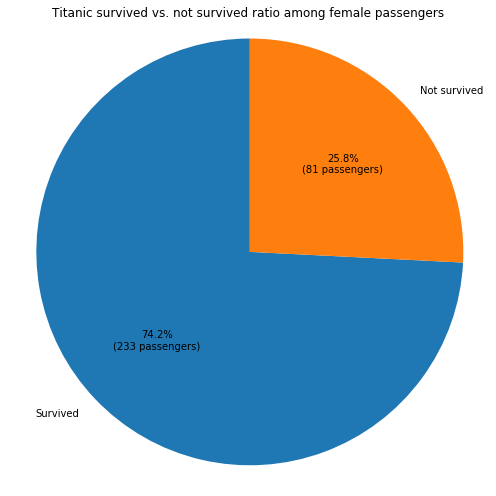

In [19]:
plot_survival_rate(survided_males_number, not_survided_males_number, "male passengers")
plot_survival_rate(survided_females_number, not_survided_females_number, "female passengers")

That is interesting but also expectable. Overal survival rate on Titanic was 38.4%. However among males it was much lower with only 18.9% and much higher among females with 74.2%. This could be expected following "Women and children first" marine code of conduct (more on it [here](https://en.wikipedia.org/wiki/Women_and_children_first)). Just by looking at the data we analyzed so far we can confirm following first half of it based on fact that survival rate was much higher among women.

The the interesting thing to check is who were these 109 males who survived: what were the factors that caused their survival considering there were still 81 women who did not entered lifeboats (not counting children). These could be children or elderly people. We will check it later when conducting age related analysis.

### 3.3 What was survival rate among different age groups.

Let's now analyze different age related analysis and check survival rate for different passengers ages.

#### Oldest and the youngest passengers.

First we will see passengers ages: youngest and oldest pasengers on board.

In [20]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
survival_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Among 714 passengers for whom we have the age information the mean age was 29.7 years old with standard deviation of 14. The median age was 28 years old. That is quit young age.

The youngest passenger was 5 months old (0.42 year old) and he survived - you can read his story [here](https://www.encyclopedia-titanica.org/titanic-survivor/assad-alexander-thomas-tannous.html).

In [22]:
survival_df.loc[survival_df["Age"].argmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

The oldest passenger was 80 years old also survived.

In [23]:
survival_df.loc[survival_df["Age"].argmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

By accident we possibly found some grave error in the data. When you read Algernon Henry Wilson Barkworth biography (you can find [here](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)), we can read that he was born in 1864. That means that in 1912, when Titanic catastrophy happened, he was 48 years old and not 80 as stated in the data set. So why 80 in the data set? We can further read that this person died in 1945 aged 80. 

This would mean that data set ages for passengers who survived contain values of post Titanic death age and not day of catastrophy age. If it is the the latter the data would be interesting for any analysis since it would contain data comparable to the ages of those who did not survived. However if it is the former the data would be useless in terms of survival analysis since containing information non related to Titanic catastrophy.

Let's analyse a few similar cases ages - meaning ages of people who survived  - determining whether they are ages at time of catastrophy or age at later death.

In [24]:
survival_df_survived_grouped.get_group(1).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [25]:
survival_df_survived_grouped.get_group(1).loc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

Born 1873, aged 38 at the time of Titanic catastrophy, died aged 1949 aged 72 years. Data set age from time of Titanic catastrophy.

In [26]:
survival_df_survived_grouped.get_group(1).loc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

Born 1886, aged 26 at the time of Titanic catastrophy, died aged 1943 aged 47 years. Data set age from time of Titanic catastrophy.

In [27]:
survival_df_survived_grouped.get_group(1).loc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

Born 1876, aged 35 at the time of Titanic catastrophy, died aged 1967 aged 91 years. Data set age from time of Titanic catastrophy.

In [28]:
survival_df_survived_grouped.get_group(1).loc[8]

PassengerId                                                    9
Survived                                                       1
Pclass                                                         3
Name           Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Sex                                                       female
Age                                                           27
SibSp                                                          0
Parch                                                          2
Ticket                                                    347742
Fare                                                     11.1333
Cabin                                                        NaN
Embarked                                                       S
Name: 8, dtype: object

Born 1884, aged 27 at the time of Titanic catastrophy, died aged 1968 aged 84 years. Data set age from time of Titanic catastrophy.

In [29]:
survival_df_survived_grouped.get_group(1).loc[9]

PassengerId                                     10
Survived                                         1
Pclass                                           2
Name           Nasser, Mrs. Nicholas (Adele Achem)
Sex                                         female
Age                                             14
SibSp                                            1
Parch                                            0
Ticket                                      237736
Fare                                       30.0708
Cabin                                          NaN
Embarked                                         C
Name: 9, dtype: object

Born 1898, aged 14 at the time of Titanic catastrophy, died aged 1970 aged 72 years. Data set age from time of Titanic catastrophy.

In [30]:
survival_df_survived_grouped.get_group(1).loc[10]

PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                          4
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object

Born 1908, aged 4 at the time of Titanic catastrophy, died aged 1963 aged 55 years. Data set age from time of Titanic catastrophy.

In [31]:
survival_df_survived_grouped.get_group(1).loc[11]

PassengerId                          12
Survived                              1
Pclass                                1
Name           Bonnell, Miss. Elizabeth
Sex                              female
Age                                  58
SibSp                                 0
Parch                                 0
Ticket                           113783
Fare                              26.55
Cabin                              C103
Embarked                              S
Name: 11, dtype: object

Born 1854, aged 58 at the time of Titanic catastrophy, died aged 1936 aged 82 years. Data set age from time of Titanic catastrophy.

In [32]:
survival_df_survived_grouped.get_group(1).loc[15]

PassengerId                                  16
Survived                                      1
Pclass                                        2
Name           Hewlett, Mrs. (Mary D Kingcome) 
Sex                                      female
Age                                          55
SibSp                                         0
Parch                                         0
Ticket                                   248706
Fare                                         16
Cabin                                       NaN
Embarked                                      S
Name: 15, dtype: object

Born 1857, aged 58 at the time of Titanic catastrophy, died aged 1917 aged 60 years. Data set age from time of Titanic catastrophy.

And again the youngest and the oldest survivors.


In [33]:
survival_df.loc[survival_df["Age"].argmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

Born 1911, aged 0.42 at the time of Titanic catastrophy, died aged 1931 aged 19 years. Data set age from time of Titanic catastrophy.

In [34]:
survival_df.loc[survival_df["Age"].argmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

Born 1964, aged 47 at the time of Titanic catastrophy, died aged 1945 aged 80 years. Data set age from time of Titanic catastrophy.

That means that this is the only case we found in which the data is wrong. We can assume that the age data - besides this record - is correct, representing passengers age at the time of catastrophy. That is a good news we can carry on our age analysis with removing data record with `PassengerId` 631.

So - just to finish our initial ages exploration - the youngest passenger (from passengers with known ages) was 5 months old. But who was the oldest Titanic passenger?

We do that by first dropping all passenger whose age is unknown, sort known ages and then select last but one record.

In [35]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
survival_sorted_by_age_df = survival_df.dropna(subset=["Age"]).sort_values(by="Age")

In [37]:
survival_sorted_by_age_df.iloc[-2]

PassengerId                    852
Survived                         0
Pclass                           3
Name           Svensson, Mr. Johan
Sex                           male
Age                             74
SibSp                            0
Parch                            0
Ticket                      347060
Fare                         7.775
Cabin                          NaN
Embarked                         S
Name: 851, dtype: object

So now we have for sure the oldest known Titanic passenger. His name was Johan Svensson, aged 74 and unfortunatelly died in the catastrophy (checked in outside sources).

#### Age structure and mortality levels.

Let's now see how Titanic population was divided among different ages groups.

In [38]:
counted_values = pd.cut(survival_df[survival_df["PassengerId"] != 631]["Age"], bins=[0, 14, 24, 34, 44, 54, 64, 74]).value_counts().sort_index()

In [39]:
counted_values

(0, 14]      77
(14, 24]    200
(24, 34]    201
(34, 44]    121
(44, 54]     73
(54, 64]     31
(64, 74]     10
Name: Age, dtype: int64

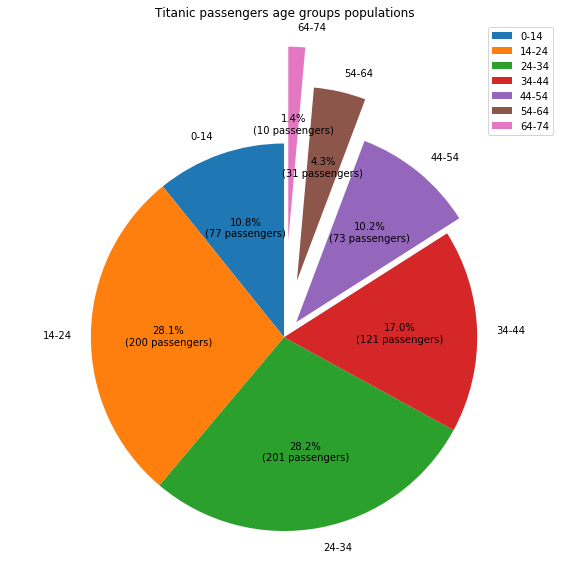

In [40]:
fig, axes = plt.subplots(figsize=(8, 8))
labels = ["0-14", "14-24", "24-34", "34-44", "44-54", "54-64", "64-74"]
explode = (0, 0, 0, 0.0, 0.1, 0.3, 0.5)
axes.pie(counted_values.values, labels=labels, explode=explode,
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * counted_values.values.sum() / 100), 
         shadow=False, startangle=90)
axes.set_title("Titanic passengers age groups populations")
axes.axis('equal');
axes.legend(labels=labels, loc="best")
fig.tight_layout()

So we see that majority of passengers (56.2%) was aged 14 to 34. 10.8% of passengers were aged below 14 years old. About 32% of passengers were aged above 44 years old.

Let's see mortality levels among different age groups.

In [41]:
# TODO: Refactor this with grouping and then plotting with function and looping.
survival_0_14_df = survival_df[survival_df["Age"] <= 14]
survival_14_24_df = survival_df[(survival_df["Age"] > 14) & (survival_df["Age"] <= 24)]
survival_24_34_df = survival_df[(survival_df["Age"] > 24) & (survival_df["Age"] <= 34)]
survival_34_44_df = survival_df[(survival_df["Age"] > 34) & (survival_df["Age"] <= 44)]
survival_44_54_df = survival_df[(survival_df["Age"] > 44) & (survival_df["Age"] <= 54)]
survival_54_64_df = survival_df[(survival_df["Age"] > 54) & (survival_df["Age"] <= 64)]
survival_64_74_df = survival_df[(survival_df["Age"] > 64) & (survival_df["Age"] <= 74)]

In [42]:
survided_0_14_number = sum(survival_0_14_df["Survived"] == 1)
not_survided_0_14_number = sum(survival_0_14_df["Survived"] == 0)

survided_14_24_number = sum(survival_14_24_df["Survived"] == 1)
not_survided_14_24_number = sum(survival_14_24_df["Survived"] == 0)

survided_24_34_number = sum(survival_24_34_df["Survived"] == 1)
not_survided_24_34_number = sum(survival_24_34_df["Survived"] == 0)

survided_34_44_number = sum(survival_34_44_df["Survived"] == 1)
not_survided_34_44_number = sum(survival_34_44_df["Survived"] == 0)

survided_44_54_number = sum(survival_44_54_df["Survived"] == 1)
not_survided_44_54_number = sum(survival_44_54_df["Survived"] == 0)

survided_54_64_number = sum(survival_54_64_df["Survived"] == 1)
not_survided_54_64_number = sum(survival_54_64_df["Survived"] == 0)

survided_64_74_number = sum(survival_64_74_df["Survived"] == 1)
not_survided_64_74_number = sum(survival_64_74_df["Survived"] == 0)


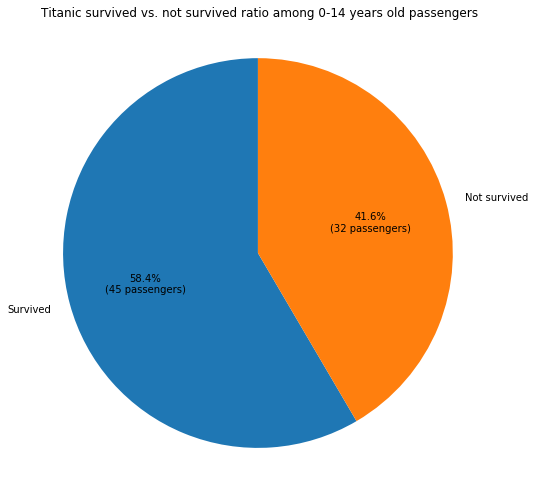

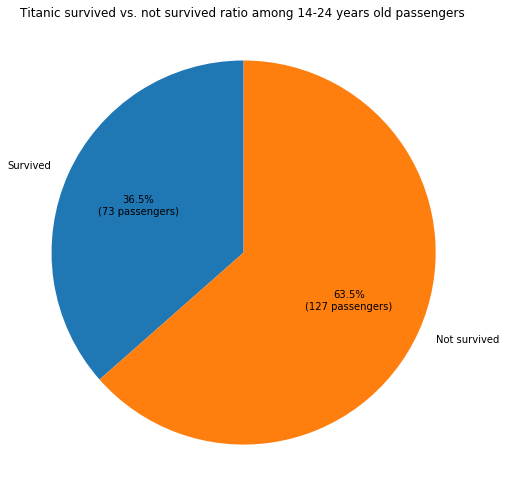

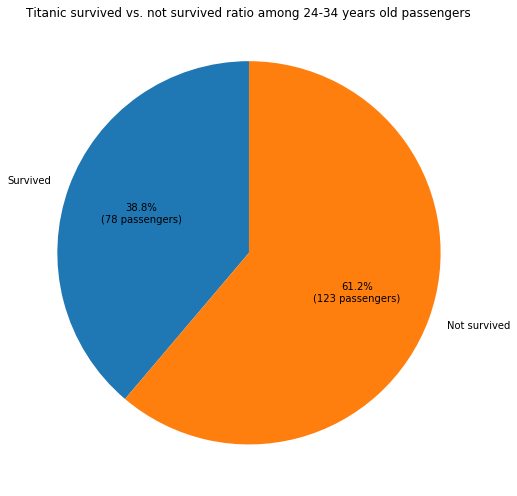

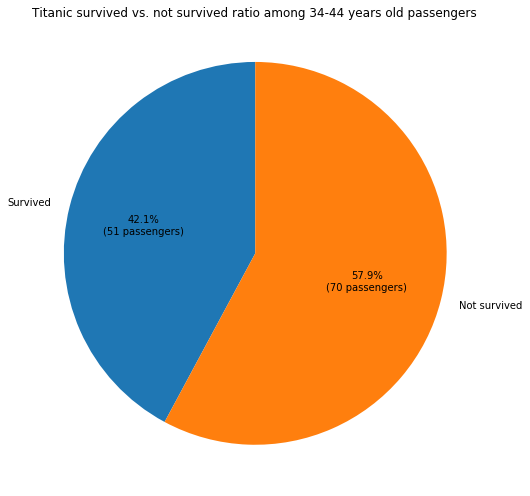

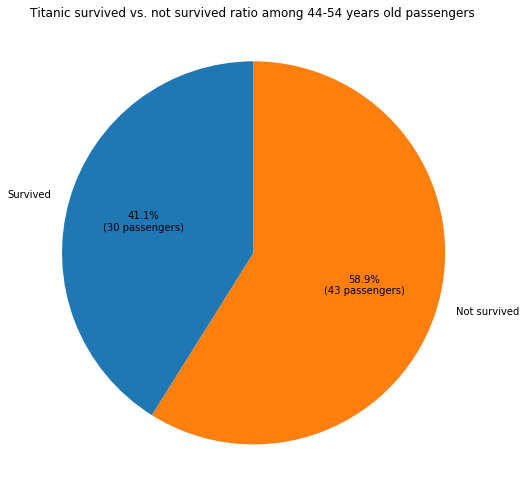

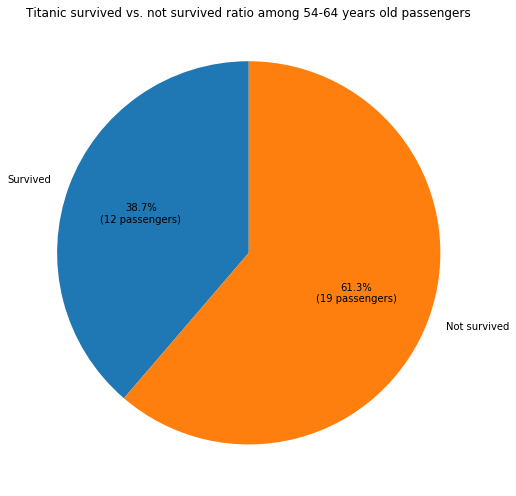

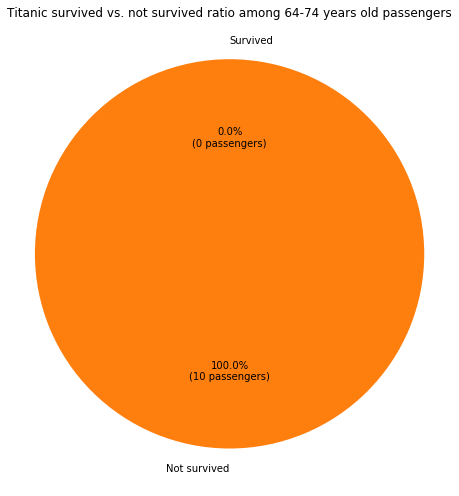

In [43]:
plot_survival_rate(survided_0_14_number, not_survided_0_14_number, "0-14 years old passengers")
plot_survival_rate(survided_14_24_number, not_survided_14_24_number, "14-24 years old passengers")
plot_survival_rate(survided_24_34_number, not_survided_24_34_number, "24-34 years old passengers")
plot_survival_rate(survided_34_44_number, not_survided_34_44_number, "34-44 years old passengers")
plot_survival_rate(survided_44_54_number, not_survided_44_54_number, "44-54 years old passengers")
plot_survival_rate(survided_54_64_number, not_survided_54_64_number, "54-64 years old passengers")
plot_survival_rate(survided_64_74_number, not_survided_64_74_number, "64-74 years old passengers")


We can see that survival rate for passengers between 14 and 64 years old is really close to the overall survival rate (38.4). Only among children aged 0-14 survival rate is much higher (58.4%) which again could be the result of marine code of conduct mentioned earlier. 

On the other hand survival rate among passengers aged 64-74 was 0%. However this group is rather small (only 10 passengers) and this could be a result of pure chance.

### 3.4 What was survival rate among different passengers' ticket classes?

Let's start with checking tickets classes passenger counts on Titanic. Let's see it on a plot.


In [44]:
survival_df_class_grouped = survival_df.groupby("Pclass")

In [45]:
first_class_count = survival_df_class_grouped.get_group(1)['PassengerId'].count()
second_class_count = survival_df_class_grouped.get_group(2)['PassengerId'].count()
third_class_count = survival_df_class_grouped.get_group(3)['PassengerId'].count()

(216, 184, 491)

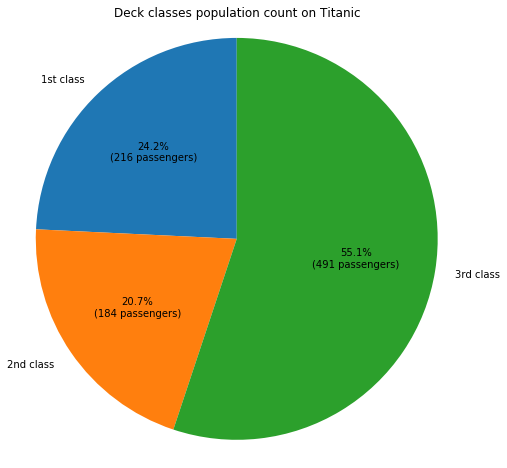

In [46]:
fig, axes = plt.subplots(figsize=(8, 8))
axes.pie([first_class_count, second_class_count, third_class_count], labels=["1st class", "2nd class", "3rd class"], 
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * survival_df["PassengerId"].count() / 100), 
         shadow=False, startangle=90)
axes.set_title("Deck classes population count on Titanic")
axes.axis('equal');

first_class_count, second_class_count, third_class_count

There were 216 passengers in the first class, 184 passengers in the second class and 491 in the third. As we can see the vast majority of Titanic traveled in the cheapest 3rd class.

And what is survival rate among different classes?

In [47]:
survided_1_class_number = sum(survival_df_class_grouped.get_group(1)["Survived"] == 1)
not_survided_1_class_number = sum(survival_df_class_grouped.get_group(1)["Survived"] == 0)

survided_2_class_number = sum(survival_df_class_grouped.get_group(2)["Survived"] == 1)
not_survided_2_class_number = sum(survival_df_class_grouped.get_group(2)["Survived"] == 0)

survided_3_class_number = sum(survival_df_class_grouped.get_group(3)["Survived"] == 1)
not_survided_3_class_number = sum(survival_df_class_grouped.get_group(3)["Survived"] == 0)


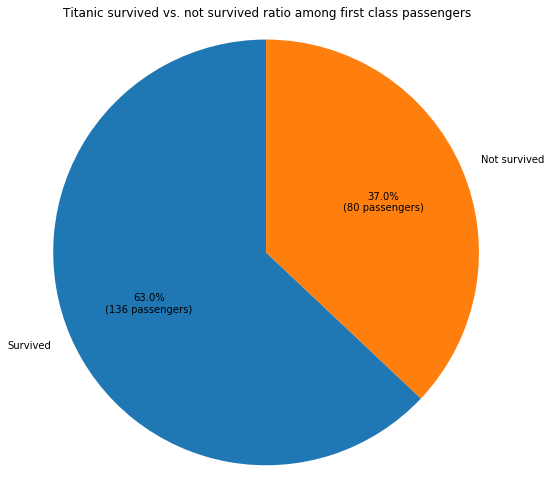

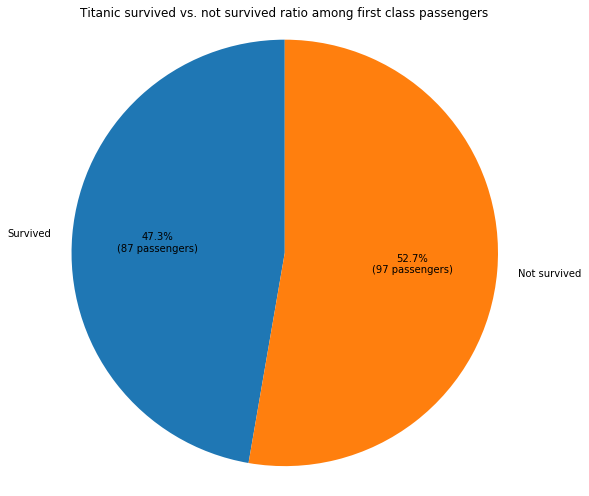

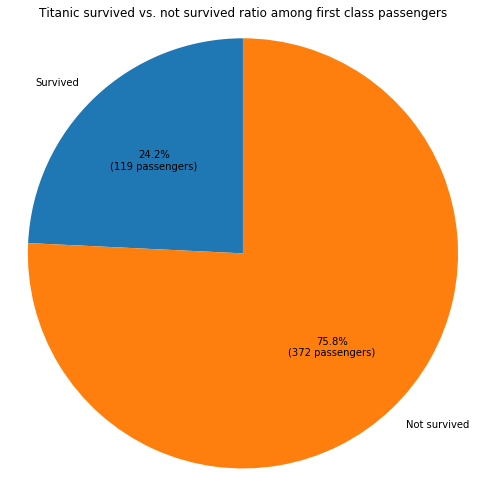

In [48]:
plot_survival_rate(survided_1_class_number, not_survided_1_class_number, "first class passengers")
plot_survival_rate(survided_2_class_number, not_survided_2_class_number, "first class passengers")
plot_survival_rate(survided_3_class_number, not_survided_3_class_number, "first class passengers")

These plots talk for themselves. Survival rate for 1st class passengers was very high - 63% of these passengers survived. It was lower for 2nd class passengers with 47.3% - still higher than the overal 38.4%. The most disturbing here is very low survival rate among 3rd class passengers: only 24.2% of them survived. This analysis is not a place to look reasons for this state - we analyze just the data set itself. There are a lot of interesting analysis of causes for this low survival rate among 3rd class passengers - they are worth reading so google them.

### 3.5 What was survival rate among people travelling with sibling or spouse.

The data set specification defines siblings as: brother, sister, stepbrother, stepsister. It also defines spouse as: husband, wife. There is no other information in the data set that could help us to separate these two groups (whether passenger traveled with sibling, spouse or alone) so we will analyse as is recorded in the data set.

It is interesting whether travelling with siblings or spouse affected chances for survival.

In [49]:
survival_df_sib_sp_grouped = survival_df.groupby("SibSp")

In [50]:
survival_df_sib_sp_grouped.describe()

Age        Fare       Parch  PassengerId      Pclass  \
SibSp                                                                      
0     count  471.000000  608.000000  608.000000   608.000000  608.000000   
      mean    31.397558   25.692028    0.185855   455.370066    2.351974   
      std     13.647767   49.733052    0.585377   255.992322    0.824539   
      min      0.420000    0.000000    0.000000     3.000000    1.000000   
      25%     22.000000    7.795800    0.000000   232.750000    2.000000   
      50%     29.000000    9.500000    0.000000   461.500000    3.000000   
      75%     39.000000   26.000000    0.000000   678.500000    3.000000   
      max     80.000000  512.329200    5.000000   891.000000    3.000000   
1     count  183.000000  209.000000  209.000000   209.000000  209.000000   
      mean    30.089727   44.147370    0.655502   439.727273    2.057416   
      std     14.645033   40.380919    1.049716   255.953585    0.858529   
      min      0.670000    6.495800    0.000000     1.000000    1.000000   
      25%     20.000000   16.100000    0.000000   231.000000    1.000000   
      50%     30.000000   26.000000    0.000000   436.000000    2.000000   
      75%     39.000000   57.000000    1.000000   658.000000    3.000000   
      max     70.000000  263.000000    6.000000   889.000000    3.000000   
2     count   25.000000   28.000000   28.000000    28.000000   28.000000   
      mean    22.620000   51.753718    0.642857   412.428571    2.357143   
      std     14.679230   66.225403    0.869835   231.778699    0.780042   
      min      0.750000    7.925000    0.000000    39.000000    1.000000   
      25%     16.000000   18.562500    0.000000   230.500000    2.000000   
      50%     23.000000   23.700000    0.000000   437.500000    3.000000   
      75%     28.000000   56.984400    1.000000   605.500000    3.000000   
      max     53.000000  262.375000    3.000000   861.000000    3.000000   
3     count   12.000000   16.000000   16.000000    16.000000   16.000000   
      mean    13.916667   68.908862    1.312500   321.562500    2.562500   
      std     11.317391   96.355121    0.704154   274.489094    0.813941   
      min      2.000000   15.850000    0.000000     8.000000    1.000000   
      25%      3.750000   21.075000    1.000000    80.500000    2.750000   
      50%      9.500000   25.466700    1.000000   286.000000    3.000000   
      75%     23.250000   27.900000    2.000000   523.250000    3.000000   
      max     33.000000  263.000000    2.000000   820.000000    3.000000   
4     count   18.000000   18.000000   18.000000    18.000000   18.000000   
      mean     7.055556   31.855556    1.500000   381.611111    3.000000   
      std      4.880601    7.322546    0.514496   298.283351    0.000000   
      min      1.000000    7.925000    1.000000    17.000000    3.000000   
      25%      3.250000   29.662500    1.000000   166.750000    3.000000   
      50%      6.500000   31.275000    1.500000   264.500000    3.000000   
      75%      9.000000   37.612500    2.000000   651.000000    3.000000   
      max     17.000000   39.687500    2.000000   851.000000    3.000000   
5     count    5.000000    5.000000    5.000000     5.000000    5.000000   
      mean    10.200000   46.900000    2.000000   336.800000    3.000000   
      std      5.805170    0.000000    0.000000   269.536083    0.000000   
      min      1.000000   46.900000    2.000000    60.000000    3.000000   
      25%      9.000000   46.900000    2.000000    72.000000    3.000000   
      50%     11.000000   46.900000    2.000000   387.000000    3.000000   
      75%     14.000000   46.900000    2.000000   481.000000    3.000000   
      max     16.000000   46.900000    2.000000   684.000000    3.000000   
8     count    0.000000    7.000000    7.000000     7.000000    7.000000   
      mean          NaN   69.550000    2.000000   481.714286    3.000000   
      std           NaN    0.000000    0.000000   334.963537    0.00

In [51]:
sibsp_0_count = survival_df_sib_sp_grouped.get_group(0)["PassengerId"].count()
sibsp_1_count = survival_df_sib_sp_grouped.get_group(1)["PassengerId"].count()
sibsp_2_count = survival_df_sib_sp_grouped.get_group(2)["PassengerId"].count()
sibsp_3_count = survival_df_sib_sp_grouped.get_group(3)["PassengerId"].count()
sibsp_4_count = survival_df_sib_sp_grouped.get_group(4)["PassengerId"].count()
sibsp_5_count = survival_df_sib_sp_grouped.get_group(5)["PassengerId"].count()
sibsp_8_count = survival_df_sib_sp_grouped.get_group(8)["PassengerId"].count()

(216, 184, 491)

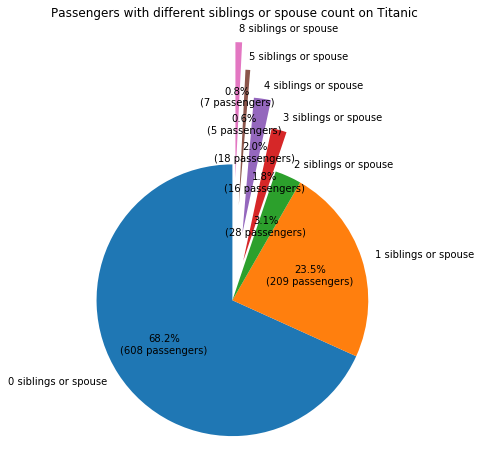

In [52]:
sibsp_counts = [sibsp_0_count, sibsp_1_count, sibsp_2_count, sibsp_3_count, sibsp_4_count, sibsp_5_count, sibsp_8_count]
sibsp_labels = ["0 siblings or spouse", "1 siblings or spouse", "2 siblings or spouse", "3 siblings or spouse", 
                "4 siblings or spouse", "5 siblings or spouse", "8 siblings or spouse"]
explode = (0, 0, 0, 0.3, 0.5, 0.7, 0.9)
fig, axes = plt.subplots(figsize=(8, 8))
axes.pie(sibsp_counts, labels=sibsp_labels, 
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * survival_df["PassengerId"].count() / 100), 
         shadow=False, startangle=90, explode=explode)
axes.set_title("Passengers with different siblings or spouse count on Titanic")
axes.axis('equal');

first_class_count, second_class_count, third_class_count

We can see that vast majority of passengers - 608 of them - traveled without siblings or spouse.

209 passengers travelled with 1 sibling or spouse. The age mean for this group of 30.09 years old suggests that they were mostly adults. 

28 passengers traveled with 2 siblings or spouse. The age mean for this group is 22.62 years old so again adult group.

Only 46 passengers traveled with 3 or more siblings. The mean age for these groups is below 14 years old which means they were all children.

What was survival rate among these passengers?

In [53]:
survided_0_sibsp_number = sum(survival_df_sib_sp_grouped.get_group(0)["Survived"] == 1)
not_survided_0_sibsp_number = sum(survival_df_sib_sp_grouped.get_group(0)["Survived"] == 0)

survided_1_sibsp_number = sum(survival_df_sib_sp_grouped.get_group(1)["Survived"] == 1)
not_survided_1_sibsp_number = sum(survival_df_sib_sp_grouped.get_group(1)["Survived"] == 0)

survided_2_sibsp_number = sum(survival_df_sib_sp_grouped.get_group(2)["Survived"] == 1)
not_survided_2_sibsp_number = sum(survival_df_sib_sp_grouped.get_group(2)["Survived"] == 0)

sibsp_3_8_passengers = pd.concat([survival_df_sib_sp_grouped.get_group(3), survival_df_sib_sp_grouped.get_group(4), 
           survival_df_sib_sp_grouped.get_group(5), survival_df_sib_sp_grouped.get_group(8)])
survided_3_8_sibsp_number = sum(sibsp_3_8_passengers["Survived"] == 1)
not_survided_3_8_sibsp_number = sum(sibsp_3_8_passengers["Survived"] == 0)

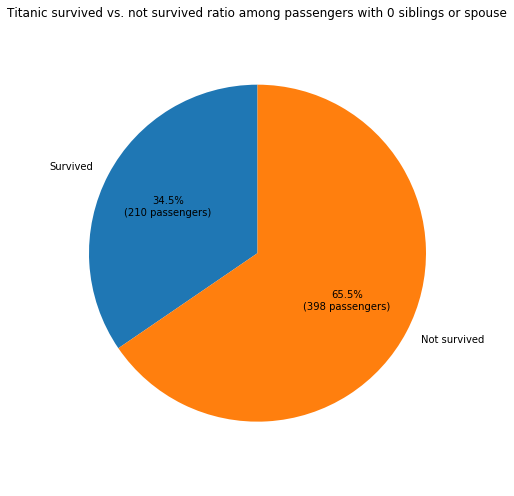

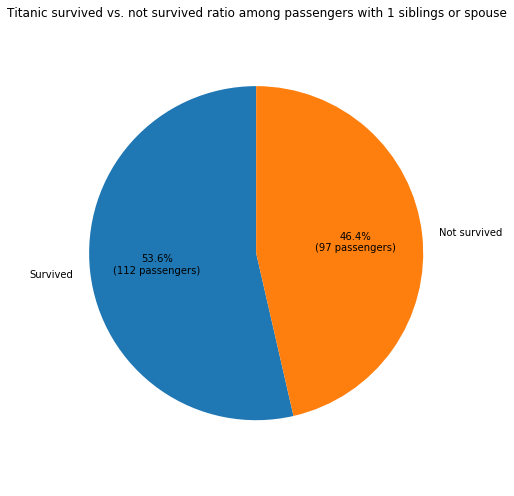

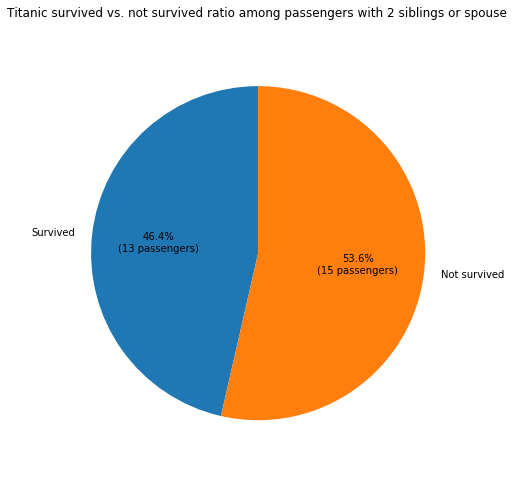

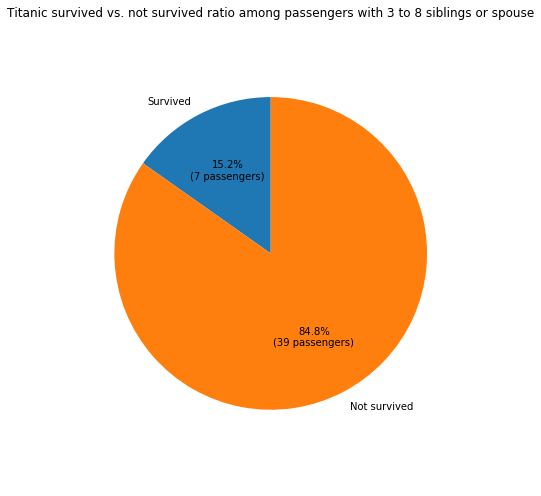

In [54]:
plot_survival_rate(survided_0_sibsp_number, not_survided_0_sibsp_number, "passengers with 0 siblings or spouse")
plot_survival_rate(survided_1_sibsp_number, not_survided_1_sibsp_number, "passengers with 1 siblings or spouse")
plot_survival_rate(survided_2_sibsp_number, not_survided_2_sibsp_number, "passengers with 2 siblings or spouse")
plot_survival_rate(survided_3_8_sibsp_number, not_survided_3_8_sibsp_number, "passengers with 3 to 8 siblings or spouse")

From above plots it looks like travelling with a company had quite big impact on survival rate. Again, the overall survival rate for all Titanic passenger was 38.4%. For passengers travelling without any siblings or spouse the survival rate was lower with 34.5%. 

The strongest evidence of this tendency is the group of passngers travelling with one sibling or spouse. The survival rate in this group is 53.6% which is much avove the overall survival rate.Also for group travelling with 2 siblings or spouse the survival rate is high, but here the group is relatively small. In general it looks like having help of other related people helped passengers to survive.

The interesting thing is very low survival level among passengers travelling with 3 to 8 siblings or spouse. As we said before the mean age in this group is around 10 years old. But as we showed earlier the survival rate for age group 0-14 was 58.4% and here it is only 15.2%. Looks like having to many people to take care of was making it less likely to survive. This group looks like interesting topic for further analysis to try to explain this situation.

### 3.6 What was survival rate among people travelling with parent or children.

In [55]:
survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`Parch` column in the data set according to data our data book represents number of parents or children aboard the Titanic. This can include three seprate groups of passengers:
- children travelling with parents,
- adults travelling with children,
- adults travelling with parents.

We could be able to separate these three subcategories from `Parch` column information by age in further analysis. If `Parch` value in not equal to zero and the passenger age is less than 18 years old we will could assume that passenger is a child travelling with parent. If passenger is above 18 years old we could assume that she or he is an adult who travels with children. However of course it can happend that adult person is travelling with a parent and/or children. 
It is not distinct separation so we will perform analysis including all of these groups together.

In [59]:
survival_df_parch_groupped = survival_df.groupby("Parch")

In [62]:
survival_df_parch_groupped.describe()

Age        Fare  PassengerId      Pclass       SibSp  \
Parch                                                                      
0     count  521.000000  678.000000   678.000000  678.000000  678.000000   
      mean    32.178503   25.586774   445.255162    2.321534    0.237463   
      std     12.570448   41.878786   256.163557    0.836665    0.496321   
      min      5.000000    0.000000     1.000000    1.000000    0.000000   
      25%     22.000000    7.854200   224.250000    2.000000    0.000000   
      50%     30.000000   10.500000   452.500000    3.000000    0.000000   
      75%     39.000000   26.000000   665.750000    3.000000    0.000000   
      max     80.000000  512.329200   891.000000    3.000000    3.000000   
1     count  110.000000  118.000000   118.000000  118.000000  118.000000   
      mean    24.422000   46.778180   465.110169    2.203390    1.084746   
      std     18.283117   63.709430   260.613602    0.832659    1.144114   
      min      0.420000    7.229200     8.000000    1.000000    0.000000   
      25%      6.250000   17.212500   254.000000    1.000000    0.000000   
      50%     23.000000   26.000000   448.000000    2.000000    1.000000   
      75%     39.000000   39.687500   691.500000    3.000000    1.000000   
      max     70.000000  512.329200   881.000000    3.000000    4.000000   
2     count   68.000000   80.000000    80.000000   80.000000   80.000000   
      mean    17.216912   64.337604   416.662500    2.275000    2.062500   
      std     13.193924   65.993088   256.432237    0.856472    2.451265   
      min      0.830000    7.750000     9.000000    1.000000    0.000000   
      25%      5.750000   26.000000   182.500000    1.000000    0.000000   
      50%     16.500000   32.881250   406.500000    3.000000    1.000000   
      75%     25.000000   69.550000   610.750000    3.000000    4.000000   
      max     58.000000  263.000000   889.000000    3.000000    8.000000   
3     count    5.000000    5.000000     5.000000    5.000000    5.000000   
      mean    33.200000   25.951660   579.200000    2.600000    1.000000   
      std     16.709279    7.862611   317.696711    0.547723    0.707107   
      min     16.000000   18.750000    87.000000    2.000000    0.000000   
      25%     24.000000   19.258300   438.000000    2.000000    1.000000   
      50%     24.000000   23.000000   737.000000    3.000000    1.000000   
      75%     48.000000   34.375000   775.000000    3.000000    1.000000   
      max     54.000000   34.375000   859.000000    3.000000    2.000000   
4     count    4.000000    4.000000     4.000000    4.000000    4.000000   
      mean    44.500000   84.968750   384.000000    2.500000    0.750000   
      std     14.617341  118.731099   167.397730    1.000000    0.500000   
      min     29.000000   21.075000   168.000000    1.000000    0.000000   
      25%     37.250000   26.193750   312.750000    2.500000    0.750000   
      50%     42.500000   27.900000   400.000000    3.000000    1.000000   
      75%     49.750000   86.675000   471.250000    3.000000    1.000000   
      max     64.000000  263.000000   568.000000    3.000000    1.000000   
5     count    5.000000    5.000000     5.000000    5.000000    5.000000   
      mean    39.200000   32.550000   435.200000    3.000000    0.600000   
      std      1.095445    4.101134   393.863809    0.000000    0.547723   
      min     38.000000   29.125000    14.000000    3.000000    0.000000   
      25%     39.000000   31.275000    26.000000    3.000000    0.000000   
      50%     39.000000   31.275000   611.000000    3.000000    1.000000   
      75%     39.000000   31.387500   639.000000    3.000000    1.000000   
      max     41.000000   39.687500   886.000000    3.000000    1.000000   
6     count    1.000000    1.000000     1.000000    1.000000    1.000000   
      mean    43.000000   46.900000   679.000000    3.000000    1.000000   
      std           NaN         NaN          NaN         NaN        

In [63]:
parch_0_count = survival_df_parch_groupped.get_group(0)["PassengerId"].count()
parch_1_count = survival_df_parch_groupped.get_group(1)["PassengerId"].count()
parch_2_count = survival_df_parch_groupped.get_group(2)["PassengerId"].count()

(216, 184, 491)

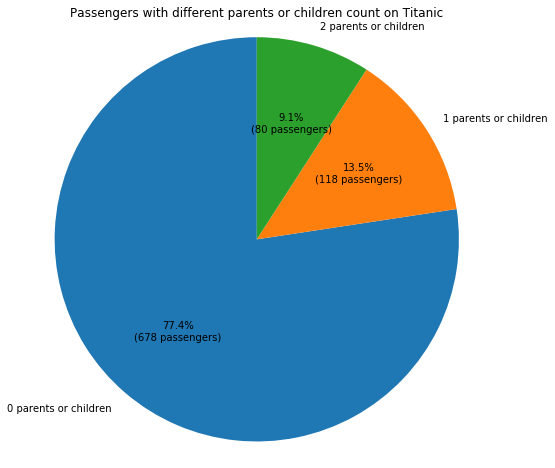

In [64]:
parch_counts = [parch_0_count, parch_1_count, parch_2_count]
parch_labels = ["0 parents or children", "1 parents or children", "2 parents or children"]
fig, axes = plt.subplots(figsize=(8, 8))
axes.pie(parch_counts, labels=parch_labels, 
         autopct=lambda p: '{0:.1f}%\n({1:.0f} passengers)'.format(p, p * (survival_df["PassengerId"].count() - 15) / 100), 
         shadow=False, startangle=90)
axes.set_title("Passengers with different parents or children count on Titanic")
axes.axis('equal');

first_class_count, second_class_count, third_class_count

Vast majority of passengers travelled with 0, 1 or 2 parents or children. Because of low number (15 passengers) we will treat passengers travelling with 3 or more parents or children as outliers and ignore these passengers in further analysis. 

What is surprising again - similar to siblings and spouse analysis - is the fact that the majority of passengers travelled alone: 77.4% of passengers travelled with no parents or children. Only 13.5% passengers travelled with 1 parent or children and 9.1% with 2 parents or children.

How survival rate looked for these groups?

In [73]:
survided_0_parch_number = sum(survival_df_parch_groupped.get_group(0)["Survived"] == 1)
not_survided_0_parch_number = sum(survival_df_parch_groupped.get_group(0)["Survived"] == 0)

survided_1_parch_number = sum(survival_df_parch_groupped.get_group(1)["Survived"] == 1)
not_survided_1_parch_number = sum(survival_df_parch_groupped.get_group(1)["Survived"] == 0)

survided_2_parch_number = sum(survival_df_parch_groupped.get_group(2)["Survived"] == 1)
not_survided_2_parch_number = sum(survival_df_parch_groupped.get_group(2)["Survived"] == 0)

In [ ]:
plot_survival_rate(survided_0_parch_number, not_survided_0_parch_number, "passengers with 0 parents or children")


## Notes

In [70]:
survival_df_parch_groupped.get_group(0).groupby("Sex").describe()

Age        Fare  PassengerId      Pclass       SibSp  \
Sex                                                                         
female count  153.000000  194.000000   194.000000  194.000000  194.000000   
       mean    30.767974   39.826591   403.030928    2.108247    0.386598   
       std     12.193752   56.611265   257.130900    0.871919    0.575876   
       min      5.000000    6.750000     2.000000    1.000000    0.000000   
       25%     22.000000    8.071875   196.750000    1.000000    0.000000   
       50%     29.000000   14.458300   373.000000    2.000000    0.000000   
       75%     37.000000   55.200000   606.750000    3.000000    1.000000   
       max     63.000000  512.329200   888.000000    3.000000    3.000000   
male   count  368.000000  484.000000   484.000000  484.000000  484.000000   
       mean    32.764946   19.879078   462.179752    2.407025    0.177686   
       std     12.693936   32.612476   254.074944    0.807337    0.447489   
       min     11.000000    0.000000     1.000000    1.000000    0.000000   
       25%     23.000000    7.775000   234.500000    2.000000    0.000000   
       50%     30.000000    8.662500   476.500000    3.000000    0.000000   
       75%     40.000000   24.150000   676.250000    3.000000    0.000000   
       max     80.000000  512.329200   891.000000    3.000000    2.000000   

                Survived  
Sex                       
female count  194.000000  
       mean     0.788660  
       std      0.409315  
       min      0.000000  
       25%      1.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
male   count  484.000000  
       mean     0.165289  
       std      0.371826  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

In [69]:
survival_df_parch_groupped.get_group(0).groupby("Pclass").describe()

Age        Fare  PassengerId       SibSp    Survived
Pclass                                                                   
1      count  134.000000  163.000000   163.000000  163.000000  163.000000
       mean    39.906716   68.639980   463.871166    0.349693    0.607362
       std     13.394838   67.645178   245.709282    0.515605    0.489842
       min     16.000000    0.000000     2.000000    0.000000    0.000000
       25%     30.000000   30.000000   270.500000    0.000000    0.000000
       50%     38.000000   52.000000   487.000000    0.000000    1.000000
       75%     49.000000   82.170800   666.500000    1.000000    1.000000
       max     80.000000  512.329200   890.000000    2.000000    1.000000
2      count  123.000000  134.000000   134.000000  134.000000  134.000000
       mean    33.081301   17.467132   429.231343    0.261194    0.358209
       std     11.609312   12.979085   254.287680    0.533524    0.481273
       min     14.000000    0.000000    10.000000    0.000000    0.000000
       25%     25.000000   12.068750   220.500000    0.000000    0.000000
       50%     30.000000   13.000000   403.000000    0.000000    0.000000
       75%     39.000000   21.000000   664.250000    0.000000    1.000000
       max     70.000000   73.500000   887.000000    3.000000    1.000000
3      count  264.000000  381.000000   381.000000  381.000000  381.000000
       mean    27.835227   10.023412   442.926509    0.181102    0.225722
       std     10.460696    7.326267   261.328146    0.465957    0.418606
       min      5.000000    0.000000     1.000000    0.000000    0.000000
       25%     21.000000    7.750000   209.000000    0.000000    0.000000
       50%     25.500000    7.895800   445.000000    0.000000    0.000000
       75%     32.000000    8.662500   665.000000    0.000000    0.000000
       max     74.000000   56.495800   891.000000    3.000000    1.000000

Mostly males and mostly third class passengers. It could look like travelling alone is causing higher mortality, but maybe it is that people travelling alone were more likely to be males travelling in third class. And both of these factors caused lower survival rate.

next - survived analysis

Measure how strong this and other relations are. Correlation? Scatter plot between variables? Add statistical analysis here. Maybe hypothesis testing. "Again, the overall survival rate for all Tutanic passenger was 38.4%. From above plots it looks like travelling with a company had quite big impact on survival rate."

Survived analysis. After we analyze different factors let's see who survived. What classes, ages, sexes dominated among those who survived - survived analysis - comparing to the overal structure (eg. 55.1% passengers were in 3rd class - how many percent of 3rd class passengers was in survived group)?

Analyze factors crossline for minimal and maximal survival rate.
"The survivors among the men were relatively more crewmen, then more First Class and Third Class, with 92% of men dying from Second Class. However, the third-class women and children also died in relatively high numbers, with 66% of those children dying."

Then identify the group with the highest mortality. Identify set of factors affecting it. Try all combinations possible.